# Heart Disease Prediction Model
---

In [ ]:
import pandas as pd

d1 = pd.read_csv("Data1.csv")
d2 = pd.read_csv("Data2.csv")
d3 = pd.read_csv("Data3.csv")
d4 = pd.read_csv("Data4.csv")
d1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
d2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [67]:
d3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
# d2.head()
d1['ChestPainType'].unique()
d1['ST_Slope'].unique()
d1["ChestPainType"] = d1["ChestPainType"].map({"ATA":2, "NAP":3 , "ASY":4 , "TA":1})
d1["ST_Slope"] = d1["ST_Slope"].map({"Up":1, "Flat":2 , "Down":3})
d1["Sex"] = d1["Sex"].map({"M":1, "F":0})
d1["ExerciseAngina"] = d1["ExerciseAngina"].map({"Y":1, "N":0})
d2["Heart Disease"] = d2["Heart Disease"].map({"Presence":1, "Absence":0})
d1["RestingECG"] = d1["RestingECG"].map({"Normal":0, "ST":1 , "LVH" : 2})
# d1.sample(10)
# d2.sample(10)

In [53]:
# d1 = d1.drop(columns=['Oldpeak'])
d1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,1,0
1,49,0,3,160,180,0,0,156,0,2,1
2,37,1,2,130,283,0,1,98,0,1,0
3,48,0,4,138,214,0,0,108,1,2,1
4,54,1,3,150,195,0,0,122,0,1,0


In [51]:
# d2 = d2.drop(columns=['ST depression','Number of vessels fluro','Thallium'])
d2.columns=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
d2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,70,1,4,130,322,0,2,109,0,2,1
1,67,0,3,115,564,0,2,160,0,2,0
2,57,1,2,124,261,0,0,141,0,1,1
3,64,1,4,128,263,0,0,105,1,2,0
4,74,0,2,120,269,0,2,121,1,1,0


In [54]:
d1.info()
d1.describe()
# d1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int64
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int64
 9   ST_Slope        918 non-null    int64
 10  HeartDisease    918 non-null    int64
dtypes: int64(11)
memory usage: 79.0 KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,1.638344,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,0.607056,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,1.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,3.000000,1.000000


In [55]:
d2.info()
d2.describe()
# d2.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             270 non-null    int64
 1   Sex             270 non-null    int64
 2   ChestPainType   270 non-null    int64
 3   RestingBP       270 non-null    int64
 4   Cholesterol     270 non-null    int64
 5   FastingBS       270 non-null    int64
 6   RestingECG      270 non-null    int64
 7   MaxHR           270 non-null    int64
 8   ExerciseAngina  270 non-null    int64
 9   ST_Slope        270 non-null    int64
 10  HeartDisease    270 non-null    int64
dtypes: int64(11)
memory usage: 23.3 KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.585185,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,0.614390,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,3.000000,1.000000


In [57]:
df = pd.concat([d1,d2],ignore_index=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,1,0
1,49,0,3,160,180,0,0,156,0,2,1
2,37,1,2,130,283,0,1,98,0,1,0
3,48,0,4,138,214,0,0,108,1,2,1
4,54,1,3,150,195,0,0,122,0,1,0


In [58]:
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df["HeartDisease"]
XT,xt,YT,yt = train_test_split(x,y,test_size=0.1)
XT.head()
# YT.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope
823,64,1,3,125,309,0,0,131,1,2
367,68,1,4,135,0,0,1,120,1,1
721,51,1,3,100,222,0,0,143,1,2
1053,46,0,3,142,177,0,2,160,1,3
96,43,1,2,142,207,0,0,138,0,1


In [59]:
ctgr_colm = XT.select_dtypes(include=['object']).columns
# ctgr_colm = ctgr_colm[:-1]
# ctgr_colm
XT = pd.get_dummies(XT, columns=ctgr_colm)
xt = pd.get_dummies(xt, columns=ctgr_colm)
# YT = YT.map({"Yes":1, "No":0})
# yt = yt.map({"Yes":1, "No":0})
XT

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope
823,64,1,3,125,309,0,0,131,1,2
367,68,1,4,135,0,0,1,120,1,1
721,51,1,3,100,222,0,0,143,1,2
1053,46,0,3,142,177,0,2,160,1,3
96,43,1,2,142,207,0,0,138,0,1
...,...,...,...,...,...,...,...,...,...,...
645,57,1,3,128,229,0,2,150,0,2
219,29,1,2,140,263,0,0,170,0,1
757,50,1,3,140,233,0,0,163,0,2
420,66,1,3,110,213,1,2,99,1,2


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XT1 = scaler.fit_transform(XT)
xt1 = scaler.fit_transform(xt)

from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=42)
# XT1, YT = sm.fit_resample(XT1, YT)
XT1

array([[ 1.09931074,  0.56546714, -0.25331583, ..., -0.34353425,
         1.24796485,  0.60649559],
       [ 1.52668166,  0.56546714,  0.81701864, ..., -0.77309818,
         1.24796485, -1.03904701],
       [-0.28964474,  0.56546714, -0.25331583, ...,  0.12508095,
         1.24796485,  0.60649559],
       ...,
       [-0.39648747,  0.56546714, -0.25331583, ...,  0.90610628,
        -0.80130462,  0.60649559],
       [ 1.3129962 ,  0.56546714, -0.25331583, ..., -1.59317478,
         1.24796485,  0.60649559],
       [ 0.45825436,  0.56546714, -0.25331583, ...,  0.55464488,
         1.24796485,  0.60649559]])

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
mdl1 = RandomForestClassifier(n_estimators=100,random_state=42)
mdl2 = LogisticRegression()
mdl1.fit(XT1,YT)
mdl2.fit(XT1,YT)

LogisticRegression()

In [62]:
import numpy as np

yp1 = mdl1.predict(xt1)
yp2 = mdl2.predict(xt1)
# np.array(yp2)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score , accuracy_score , precision_score

print("Classification Report 1 :\n", classification_report(yt, yp1))
print("Classification Report 2 :\n", classification_report(yt, yp2))
print("Confusion Matrix 1 :\n", confusion_matrix(yt, yp1))
print("Confusion Matrix 2 :\n", confusion_matrix(yt, yp2))
print("ROC-AUC Score 1 :", roc_auc_score(yt, yp1))
print("ROC-AUC Score 2 :", roc_auc_score(yt, yp2))
print("\n\nAccuracy 1 :", accuracy_score(yt, yp1)*100,"%")
print("\n\nAccuracy 2 :", accuracy_score(yt, yp2)*100,"%")
print("\n\nprecision_score 1 : ", precision_score(yt, yp1)*100,"%\n")
print("\n\nprecision_score 2 :", precision_score(yt, yp2)*100,"%\n")

Classification Report 1 :
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.91      0.95      0.93        56

    accuracy                           0.93       119
   macro avg       0.93      0.93      0.93       119
weighted avg       0.93      0.93      0.93       119

Classification Report 2 :
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        63
           1       0.80      0.84      0.82        56

    accuracy                           0.82       119
   macro avg       0.82      0.82      0.82       119
weighted avg       0.82      0.82      0.82       119

Confusion Matrix 1 :
 [[58  5]
 [ 3 53]]
Confusion Matrix 2 :
 [[51 12]
 [ 9 47]]
ROC-AUC Score 1 : 0.933531746031746
ROC-AUC Score 2 : 0.824404761904762


Accuracy 1 : 93.27731092436974 %


Accuracy 2 : 82.35294117647058 %


precision_score 1 :  91.37931034482759 %



precision_score 2 : 79

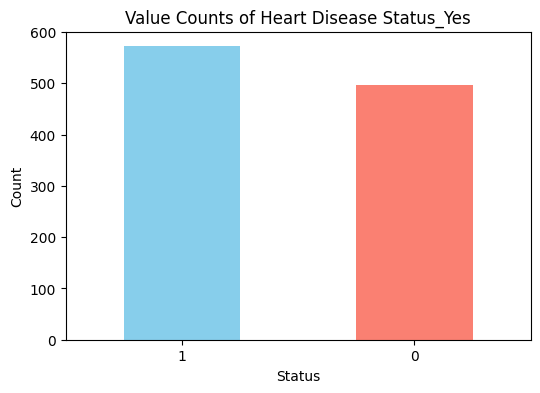

In [64]:
import matplotlib.pyplot as plt

# Replace 'd1' with the correct DataFrame if needed
# Plot value counts for 'Heart Disease Status_Yes'
value_counts = YT.value_counts()
plt.figure(figsize=(6,4))
value_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Value Counts of Heart Disease Status_Yes')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()